In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
PATH = "../../../../Datasets/Indian Premier League/matches.csv"

df_matches = pd.read_csv(PATH)
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [3]:
columns = sorted(df_matches.columns.values)

print("Columns: ")
print("")
for column in columns:
    print(column)

Columns: 

city
date
dl_applied
id
player_of_match
result
season
team1
team2
toss_decision
toss_winner
umpire1
umpire2
umpire3
venue
win_by_runs
win_by_wickets
winner


In [4]:
teams = ['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 
         'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']

print("Teams: ")
print("")
for team in teams:
    print(team)

Teams: 

Chennai Super Kings
Deccan Chargers
Delhi Daredevils
Gujarat Lions
Kings XI Punjab
Kochi Tuskers Kerala
Kolkata Knight Riders
Mumbai Indians
Pune Warriors
Rajasthan Royals
Rising Pune Supergiants
Royal Challengers Bangalore
Sunrisers Hyderabad


No. of Matches Each Team has played: 

('Chennai Super Kings', 131)
('Deccan Chargers', 75)
('Delhi Daredevils', 133)
('Gujarat Lions', 16)
('Kings XI Punjab', 134)
('Kochi Tuskers Kerala', 14)
('Kolkata Knight Riders', 132)
('Mumbai Indians', 140)
('Pune Warriors', 46)
('Rajasthan Royals', 118)
('Rising Pune Supergiants', 14)
('Royal Challengers Bangalore', 139)
('Sunrisers Hyderabad', 62)


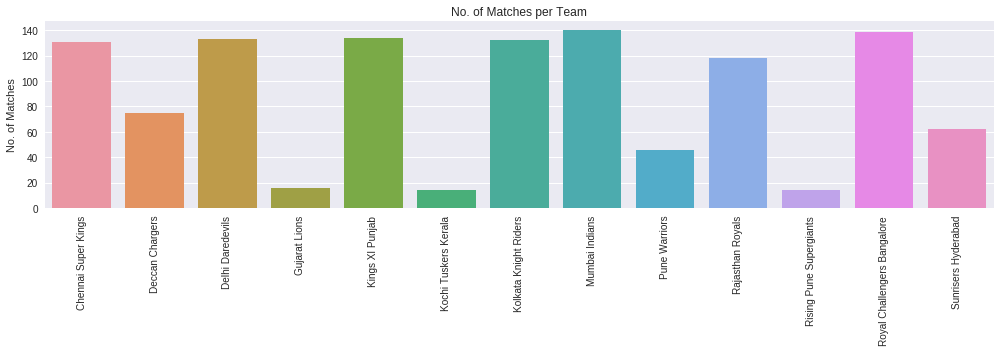

In [5]:
df_matches_per_team = df_matches.team1.value_counts()[teams]
df_matches_per_team += df_matches.team2.value_counts()[teams]

fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(14)

ax1 = sns.barplot(x = teams, y = df_matches_per_team, ax = ax)

ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation = 90)
ax1.set_title("No. of Matches per Team")
ax1.set_ylabel("No. of Matches")

fig.tight_layout()

print("No. of Matches Each Team has played: ")
print("")
for team in teams:
    print(team, df_matches_per_team[team])

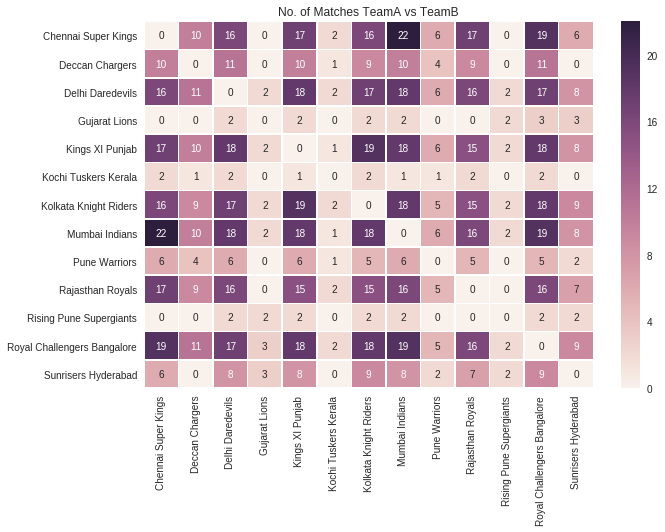

In [6]:
df_no_of_matches_teama_teamb = pd.DataFrame({'no of matches' : df_matches.groupby(["team1", "team2"]).size()}).reset_index()

no_of_matches_teama_teamb = np.zeros((len(teams), len(teams)), dtype = np.int32)
for team1 in range(len(teams)):
    for team2 in range(len(teams)):
        if team1 != team2:
            temp = df_no_of_matches_teama_teamb.ix[df_no_of_matches_teama_teamb.team1 == teams[team1]]
            temp = temp["no of matches"].ix[temp.team2 == teams[team2]].values
            if len(temp) != 0:
                no_of_matches_teama_teamb[team1, team2] += temp[0]
                        
            temp = df_no_of_matches_teama_teamb.ix[df_no_of_matches_teama_teamb.team1 == teams[team2]]
            temp = temp["no of matches"].ix[temp.team2 == teams[team1]].values
            if len(temp) != 0:
                no_of_matches_teama_teamb[team1, team2] += temp[0]
                
fig, ax = plt.subplots(1, 1)
fig.set_figheight(7.5)
fig.set_figwidth(10)

ax1 = sns.heatmap(no_of_matches_teama_teamb, xticklabels = teams, yticklabels = teams, linewidths = 0.5, annot = True, fmt = "d", ax = ax)

ax1.set_title("No. of Matches TeamA vs TeamB")

fig.tight_layout()

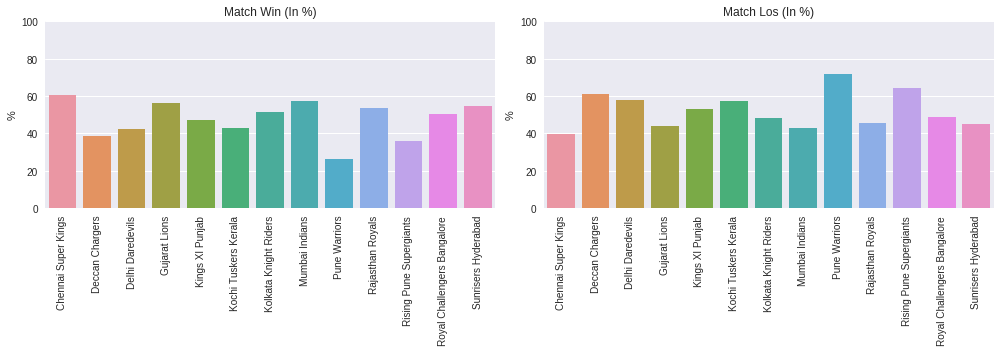

In [7]:
df_matches["loser"] = np.where(df_matches.winner != df_matches.team1, df_matches.team1, df_matches.team2)

match_won = (df_matches.winner.value_counts()[teams] * 100.0) / df_matches_per_team
match_los = (df_matches.loser.value_counts()[teams] * 100.0) / df_matches_per_team

fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(14)

ax1 = sns.barplot(x = teams, y = match_won, ax = ax[0])
ax2 = sns.barplot(x = teams, y = match_los, ax = ax[1])

ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation = 90)
ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(), rotation = 90)

ax1.set_title("Match Win (In %)")
ax2.set_title("Match Los (In %)")

ax1.set_ylabel("%")
ax2.set_ylabel("%")

ax1.set_ylim(bottom = 0, top = 100)
ax2.set_ylim(bottom = 0, top = 100)

fig.tight_layout()

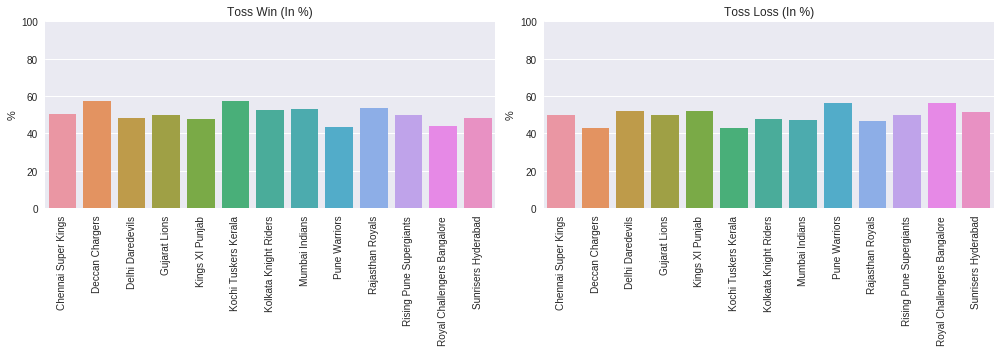

In [8]:
df_matches["toss_loser"] = np.where(df_matches.toss_winner != df_matches.team1, df_matches.team1, df_matches.team2)

toss_won = (df_matches["toss_winner"].value_counts()[teams] * 100.0) / df_matches_per_team
toss_los = (df_matches["toss_loser"].value_counts()[teams] * 100.0) / df_matches_per_team

fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(14)

ax1 = sns.barplot(x = teams, y = toss_won, ax = ax[0])
ax2 = sns.barplot(x = teams, y = toss_los, ax = ax[1])

ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation = 90)
ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(), rotation = 90)

ax1.set_title("Toss Win (In %)")
ax2.set_title("Toss Loss (In %)")

ax1.set_ylabel("%")
ax2.set_ylabel("%")

ax1.set_ylim(bottom = 0, top = 100)
ax2.set_ylim(bottom = 0, top = 100)

fig.tight_layout()

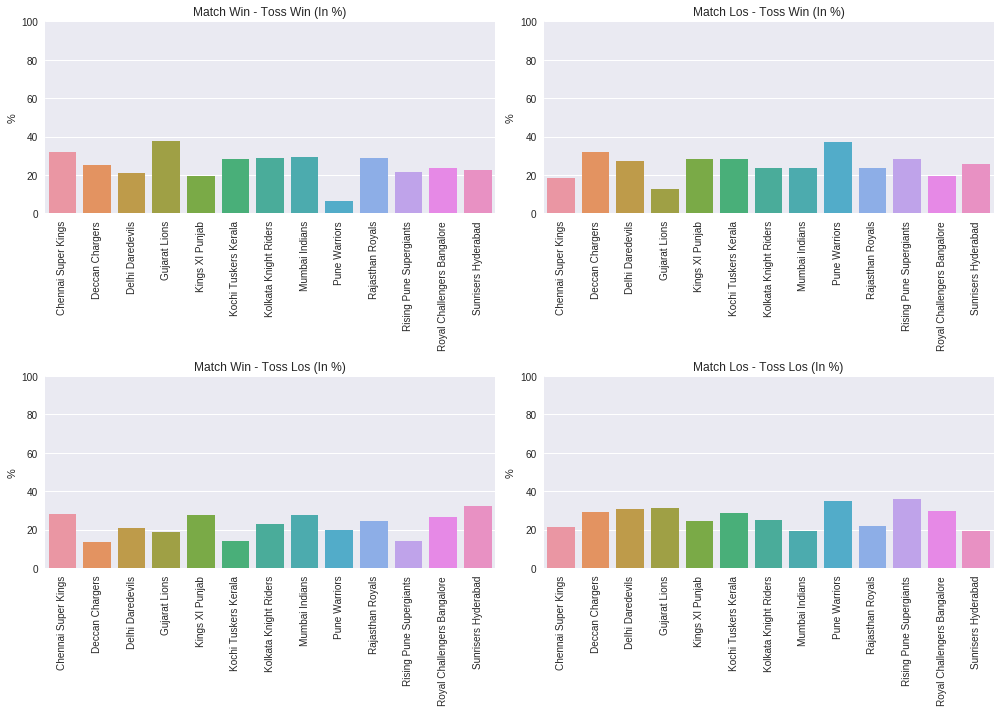

In [9]:
toss_won_match_won = (df_matches.winner.ix[df_matches.winner == df_matches.toss_winner].value_counts()[teams] * 100.0) / df_matches_per_team
toss_won_match_los = (df_matches.loser.ix[df_matches.loser == df_matches.toss_winner].value_counts()[teams] * 100.0) / df_matches_per_team

toss_los_match_won = (df_matches.winner.ix[df_matches.winner == df_matches.toss_loser].value_counts()[teams] * 100.0) / df_matches_per_team
toss_los_match_los = (df_matches.loser.ix[df_matches.loser == df_matches.toss_loser].value_counts()[teams] * 100.0) / df_matches_per_team

fig, ax = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(14)

ax1 = sns.barplot(x = teams, y = toss_won_match_won, ax = ax[0][0])
ax2 = sns.barplot(x = teams, y = toss_won_match_los, ax = ax[0][1])
ax3 = sns.barplot(x = teams, y = toss_los_match_won, ax = ax[1][0])
ax4 = sns.barplot(x = teams, y = toss_los_match_los, ax = ax[1][1])

ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation = 90)
ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(), rotation = 90)
ax3.set_xticklabels(ax3.xaxis.get_majorticklabels(), rotation = 90)
ax4.set_xticklabels(ax4.xaxis.get_majorticklabels(), rotation = 90)

ax1.set_title("Match Win - Toss Win (In %)")
ax2.set_title("Match Los - Toss Win (In %)")
ax3.set_title("Match Win - Toss Los (In %)")
ax4.set_title("Match Los - Toss Los (In %)")

ax1.set_ylabel("%")
ax2.set_ylabel("%")
ax3.set_ylabel("%")
ax4.set_ylabel("%")

ax1.set_ylim(bottom = 0, top = 100)
ax2.set_ylim(bottom = 0, top = 100)
ax3.set_ylim(bottom = 0, top = 100)
ax4.set_ylim(bottom = 0, top = 100)

fig.tight_layout()

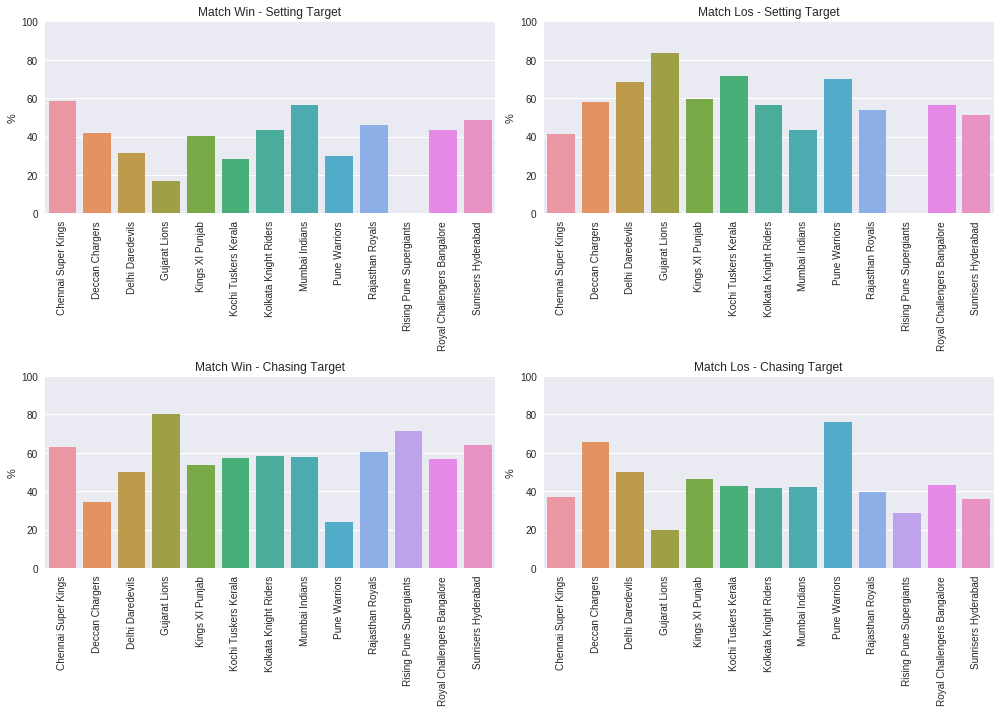

In [10]:
no_of_matches_setting_target_team = np.zeros((len(teams)))
no_of_matches_chasing_target_team = np.zeros((len(teams)))

# Setting the target and win
df_setting_target_win = None
temp = df_matches.ix[df_matches.winner == df_matches.toss_winner]
df_setting_target_win = temp.ix[temp.toss_decision == "bat"]
temp = df_matches.ix[df_matches.winner != df_matches.toss_winner]
df_setting_target_win = df_setting_target_win.append(temp.ix[temp.toss_decision == "field"])

# Setting the target and loss
df_setting_target_los = None
temp = df_matches.ix[df_matches.loser == df_matches.toss_winner]
df_setting_target_los = temp.ix[temp.toss_decision == "bat"]
temp = df_matches.ix[df_matches.loser != df_matches.toss_winner]
df_setting_target_los = df_setting_target_los.append(temp.ix[temp.toss_decision == "field"])

# Chasing the target and win
df_chasing_target_win = None
temp = df_matches.ix[df_matches.winner == df_matches.toss_winner]
df_chasing_target_win = temp.ix[temp.toss_decision == "field"]
temp = df_matches.ix[df_matches.winner != df_matches.toss_winner]
df_chasing_target_win = df_chasing_target_win.append(temp.ix[temp.toss_decision == "bat"])

# Chasing the target and loss
df_chasing_target_los = None
temp = df_matches.ix[df_matches.loser == df_matches.toss_winner]
df_chasing_target_los = temp.ix[temp.toss_decision == "field"]
temp = df_matches.ix[df_matches.loser != df_matches.toss_winner]
df_chasing_target_los = df_chasing_target_los.append(temp.ix[temp.toss_decision == "bat"])

df_setting_target_win_team = df_setting_target_win.winner.value_counts()[teams].values
df_setting_target_los_team = df_setting_target_los.loser.value_counts()[teams].values
df_chasing_target_win_team = df_chasing_target_win.winner.value_counts()[teams].values
df_chasing_target_los_team = df_chasing_target_los.loser.value_counts()[teams].values

no_of_matches_setting_target_team += df_setting_target_win_team
no_of_matches_setting_target_team += df_setting_target_los_team
no_of_matches_chasing_target_team += df_chasing_target_win_team
no_of_matches_chasing_target_team += df_chasing_target_los_team

df_setting_target_win_team = df_setting_target_win_team * 100.0 / no_of_matches_setting_target_team
df_setting_target_los_team = df_setting_target_los_team * 100.0 / no_of_matches_setting_target_team
df_chasing_target_win_team = df_chasing_target_win_team * 100.0 / no_of_matches_chasing_target_team
df_chasing_target_los_team = df_chasing_target_los_team * 100.0 / no_of_matches_chasing_target_team

fig, ax = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(14)

ax1 = sns.barplot(x = teams, y = df_setting_target_win_team, ax = ax[0][0])
ax2 = sns.barplot(x = teams, y = df_setting_target_los_team, ax = ax[0][1])
ax3 = sns.barplot(x = teams, y = df_chasing_target_win_team, ax = ax[1][0])
ax4 = sns.barplot(x = teams, y = df_chasing_target_los_team, ax = ax[1][1])

ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation = 90)
ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(), rotation = 90)
ax3.set_xticklabels(ax3.xaxis.get_majorticklabels(), rotation = 90)
ax4.set_xticklabels(ax4.xaxis.get_majorticklabels(), rotation = 90)

ax1.set_title("Match Win - Setting Target")
ax2.set_title("Match Los - Setting Target")
ax3.set_title("Match Win - Chasing Target")
ax4.set_title("Match Los - Chasing Target")

ax1.set_ylabel("%")
ax2.set_ylabel("%")
ax3.set_ylabel("%")
ax4.set_ylabel("%")

ax1.set_ylim(bottom = 0, top = 100)
ax2.set_ylim(bottom = 0, top = 100)
ax3.set_ylim(bottom = 0, top = 100)
ax4.set_ylim(bottom = 0, top = 100)

fig.tight_layout()